Dataset : Stress level

Roll number : 55

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset

In [2]:
import pandas as pd
sl = pd.read_csv("/content/drive/MyDrive/stresslevel.csv")

In [3]:
sl.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [4]:
sl.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Data Cleaning

In [5]:
# Checking for missing values
missing_values = sl.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [6]:
# Handling missing values by filling them with the median
sl.fillna(sl.median(), inplace=True)

In [7]:
# Removing duplicate rows, if any
sl.drop_duplicates(inplace=True)

In [8]:
# Checking data types
print("Data types:\n", sl.dtypes)

Data types:
 anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


In [9]:
# Converting columns to appropriate data types if needed (e.g., integer, float)
sl['social_support'] = sl['social_support'].astype(int)

In [10]:
# Displaying the cleaned data
print(sl.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

Data Manipulation

In [11]:
# Renaming columns for better readability
sl.rename(columns={'self_esteem': 'SelfEsteem', 'sleep_quality': 'SleepQuality'}, inplace=True)

In [12]:
# Adding a new column that categorizes stress levels
sl['StressCategory'] = pd.cut(sl['stress_level'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

In [13]:
# Filtering data: Only include rows where 'SelfEsteem' is above 10
filtered_data = sl[sl['SelfEsteem'] > 10]

In [14]:
# Sorting data by 'anxiety_level' in descending order
sorted_data = sl.sort_values(by='anxiety_level', ascending=False)

In [15]:
# Displaying manipulated data
print(filtered_data.head())
print(sorted_data.head())

   anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0             14          20                      0          11         2   
2             12          18                      1          14         2   
3             16          12                      1          15         4   
4             16          28                      0           7         2   
5             20          13                      1          21         3   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0               1             2                  4            2   
2               1             2                  2            2   
3               3             1                  3            4   
4               3             5                  1            3   
5               3             1                  4            3   

   living_conditions  ...  academic_performance  study_load  \
0                  3  ...                     3           2   
2       

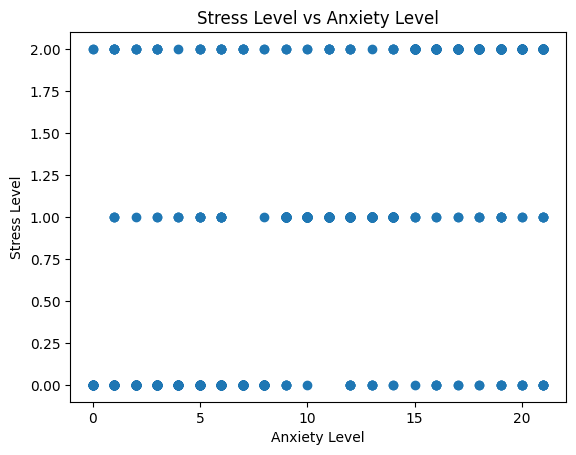

In [16]:
import matplotlib.pyplot as plt

plt.scatter(sl['anxiety_level'], sl['stress_level'])
plt.xlabel('Anxiety Level')
plt.ylabel('Stress Level')
plt.title('Stress Level vs Anxiety Level')
plt.show()

Normalize stress level column (scale values between 0 and 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for scaling
numerical_columns = [
    'anxiety_level', 'SelfEsteem', 'mental_health_history', 'depression',
    'headache', 'blood_pressure', 'SleepQuality', 'breathing_problem',
    'noise_level', 'living_conditions', 'basic_needs',
    'academic_performance', 'study_load', 'teacher_student_relationship',
    'future_career_concerns', 'social_support', 'peer_pressure',
    'extracurricular_activities', 'bullying', 'stress_level']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the selected columns
sl[numerical_columns] = scaler.fit_transform(sl[numerical_columns])

# Displaying the scaled DataFrame
print(sl.head())

   anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0       0.666667    0.666667                    0.0    0.407407       0.4   
1       0.714286    0.266667                    1.0    0.555556       1.0   
2       0.571429    0.600000                    1.0    0.518519       0.4   
3       0.761905    0.400000                    1.0    0.555556       0.8   
4       0.761905    0.933333                    0.0    0.259259       0.4   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0             0.0           0.4                0.8          0.4   
1             1.0           0.2                0.8          0.6   
2             0.0           0.4                0.4          0.4   
3             1.0           0.2                0.6          0.8   
4             1.0           1.0                0.2          0.6   

   living_conditions  ...  academic_performance  study_load  \
0                0.6  ...                   0.6         0.4   
1       

Summarizing data (Descriptive Analysis)

In [18]:
sl.idxmax()

,0
anxiety_level,19
SelfEsteem,41
mental_health_history,1
depression,9
headache,1
blood_pressure,1
SleepQuality,4
breathing_problem,7
noise_level,11
living_conditions,9


In [19]:
sl.isin([3])

,anxiety_level,SelfEsteem,mental_health_history,depression,headache,blood_pressure,SleepQuality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,StressCategory
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Summary statistics for numeric columns
summary_stats = sl.describe()
print(summary_stats)

       anxiety_level   SelfEsteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean        0.526840     0.592576               0.492727     0.465017   
std         0.291312     0.298153               0.500175     0.286185   
min         0.000000     0.000000               0.000000     0.000000   
25%         0.285714     0.366667               0.000000     0.222222   
50%         0.523810     0.633333               0.000000     0.444444   
75%         0.761905     0.866667               1.000000     0.703704   
max         1.000000     1.000000               1.000000     1.000000   

          headache  blood_pressure  SleepQuality  breathing_problem  \
count  1100.000000     1100.000000   1100.000000        1100.000000   
mean      0.501636        0.590909      0.532000           0.550727   
std       0.281871        0.416787      0.309677           0.280143   
min       0.000000        0.000000      0.000000          

In [21]:
# Checking for missing values
missing_values = sl.isnull().sum()
print(missing_values)

anxiety_level                     0
SelfEsteem                        0
mental_health_history             0
depression                        0
headache                          0
blood_pressure                    0
SleepQuality                      0
breathing_problem                 0
noise_level                       0
living_conditions                 0
safety                            0
basic_needs                       0
academic_performance              0
study_load                        0
teacher_student_relationship      0
future_career_concerns            0
social_support                    0
peer_pressure                     0
extracurricular_activities        0
bullying                          0
stress_level                      0
StressCategory                  373
dtype: int64


In [22]:
# Descriptive statistics for the 'stress_level' column
stress_level_stats = sl['stress_level'].describe()
print(stress_level_stats)

count    1100.000000
mean        0.498182
std         0.410836
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: stress_level, dtype: float64


In [23]:
# Calculating maximum values for each column
max_values = sl.max()
print("Maximum values:\n", max_values)


Maximum values:
 anxiety_level                   1.0
SelfEsteem                      1.0
mental_health_history           1.0
depression                      1.0
headache                        1.0
blood_pressure                  1.0
SleepQuality                    1.0
breathing_problem               1.0
noise_level                     1.0
living_conditions               1.0
safety                            5
basic_needs                     1.0
academic_performance            1.0
study_load                      1.0
teacher_student_relationship    1.0
future_career_concerns          1.0
social_support                  1.0
peer_pressure                   1.0
extracurricular_activities      1.0
bullying                        1.0
stress_level                    1.0
StressCategory                  Low
dtype: object


In [24]:
# Calculating average values for numeric columns only
mean_values = sl.select_dtypes(include=['number']).mean()
print("\nMean (average) values:\n", mean_values)


Mean (average) values:
 anxiety_level                   0.526840
SelfEsteem                      0.592576
mental_health_history           0.492727
depression                      0.465017
headache                        0.501636
blood_pressure                  0.590909
SleepQuality                    0.532000
breathing_problem               0.550727
noise_level                     0.529818
living_conditions               0.503636
safety                          2.737273
basic_needs                     0.554545
academic_performance            0.554545
study_load                      0.524364
teacher_student_relationship    0.529636
future_career_concerns          0.529818
social_support                  0.627273
peer_pressure                   0.546909
extracurricular_activities      0.553455
bullying                        0.523455
stress_level                    0.498182
dtype: float64


In [25]:
# Calculating median values for numeric columns only
median_values = sl.select_dtypes(include=['number']).median()
print("\nMedian values:\n", median_values)


Median values:
 anxiety_level                   0.523810
SelfEsteem                      0.633333
mental_health_history           0.000000
depression                      0.444444
headache                        0.600000
blood_pressure                  0.500000
SleepQuality                    0.500000
breathing_problem               0.600000
noise_level                     0.600000
living_conditions               0.400000
safety                          2.000000
basic_needs                     0.600000
academic_performance            0.400000
study_load                      0.400000
teacher_student_relationship    0.400000
future_career_concerns          0.400000
social_support                  0.666667
peer_pressure                   0.400000
extracurricular_activities      0.500000
bullying                        0.600000
stress_level                    0.500000
dtype: float64


In [26]:
# Calculating mode values for numeric columns only
mode_values = sl.select_dtypes(include=['number']).mode()
print("\Mode values:\n", mode_values)

\Mode values:
    anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0       0.619048    0.833333                    0.0     0.37037       0.2   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0             1.0           0.2                0.4          0.4   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.4  ...          0.4                   0.4         0.4   

   teacher_student_relationship  future_career_concerns  social_support  \
0                           0.4                     0.2             1.0   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0            0.4                         0.4       0.2           0.0  

[1 rows x 21 columns]


<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-2072152776.py:3: SyntaxWarning: invalid escape sequence '\M'
  print("\Mode values:\n", mode_values)


In [27]:
# Group by 'self_esteem' and calculate the average 'stress_level'
grouped_stats = sl.groupby('SelfEsteem')['stress_level'].mean()
print(grouped_stats)

SelfEsteem
0.000000    0.875000
0.033333    0.964286
0.066667    0.833333
0.100000    0.880000
0.133333    0.947368
0.166667    0.894737
0.200000    0.838710
0.233333    0.803571
0.266667    0.884615
0.300000    0.900000
0.333333    0.880952
0.366667    0.824324
0.400000    0.956522
0.433333    0.875000
0.466667    0.928571
0.500000    0.690000
0.533333    0.459459
0.566667    0.487500
0.600000    0.458333
0.633333    0.464286
0.666667    0.500000
0.700000    0.473684
0.733333    0.537037
0.766667    0.555556
0.800000    0.500000
0.833333    0.174699
0.866667    0.025862
0.900000    0.076271
0.933333    0.075472
0.966667    0.028846
1.000000    0.025000
Name: stress_level, dtype: float64


In [28]:
# Performing a t-test to compare high and low self-esteem groups
from scipy.stats import ttest_ind
high_self_esteem = sl[sl['SelfEsteem'] > 15]['stress_level']
low_self_esteem = sl[sl['SelfEsteem'] <= 15]['stress_level']
t_stat, p_val = ttest_ind(high_self_esteem, low_self_esteem)
print(f'T-test statistic: {t_stat}, p-value: {p_val}')

T-test statistic: nan, p-value: nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Data Aggregation

In [29]:
# Grouping data by 'SelfEsteem' and calculating mean stress level
grouped_data = sl.groupby('SelfEsteem')['stress_level'].mean().reset_index()

In [30]:
# Aggregating data with multiple functions (mean, min, max) for 'stress_level' by 'anxiety_level'
aggregated_data = sl.groupby('anxiety_level').agg({'stress_level': ['mean', 'min', 'max'],'SelfEsteem': 'mean'}).reset_index()

In [31]:
# Displaying aggregated results
print(grouped_data.head())
print(aggregated_data.head())

   SelfEsteem  stress_level
0    0.000000      0.875000
1    0.033333      0.964286
2    0.066667      0.833333
3    0.100000      0.880000
4    0.133333      0.947368
  anxiety_level stress_level           SelfEsteem
                        mean  min  max       mean
0      0.000000     0.068966  0.0  1.0   0.891954
1      0.047619     0.163043  0.0  1.0   0.816667
2      0.095238     0.097826  0.0  1.0   0.805072
3      0.142857     0.125000  0.0  1.0   0.782639
4      0.190476     0.075758  0.0  1.0   0.826263


# Data Visualization using Pandas





anxiety_level                    float64
SelfEsteem                       float64
mental_health_history            float64
depression                       float64
headache                         float64
blood_pressure                   float64
SleepQuality                     float64
breathing_problem                float64
noise_level                      float64
living_conditions                float64
safety                             int64
basic_needs                      float64
academic_performance             float64
study_load                       float64
teacher_student_relationship     float64
future_career_concerns           float64
social_support                   float64
peer_pressure                    float64
extracurricular_activities       float64
bullying                         float64
stress_level                     float64
StressCategory                  category
dtype: object
[0.66666667 0.33333333 1.         0.        ]
[0.66666667 0.26666667 0.6        0.4 

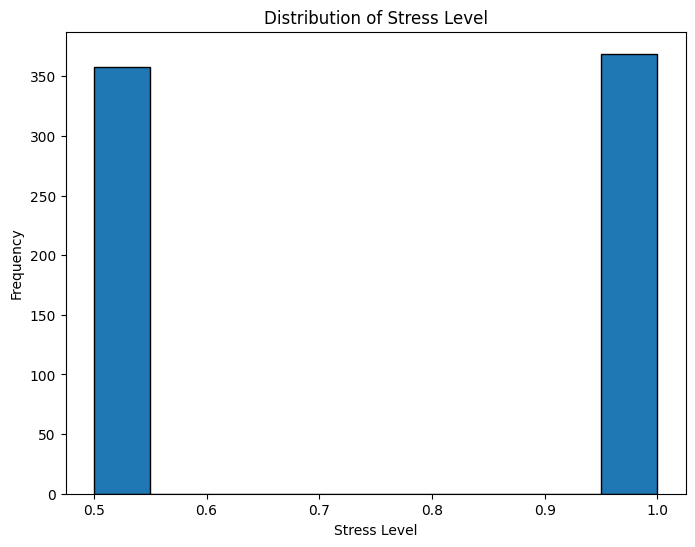

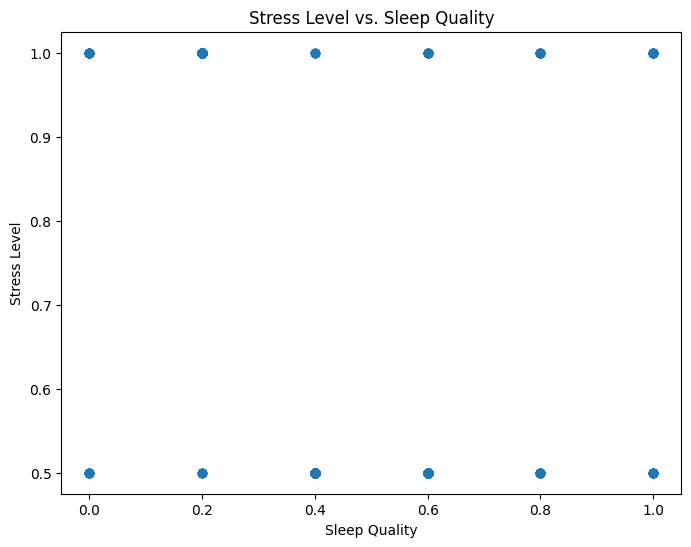

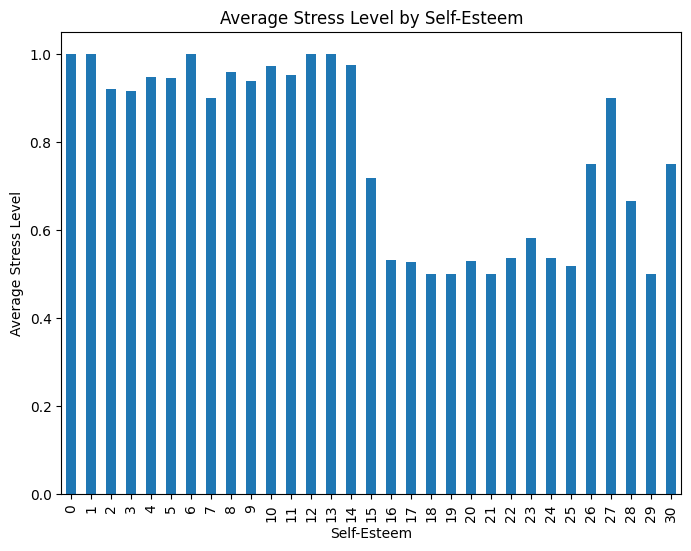

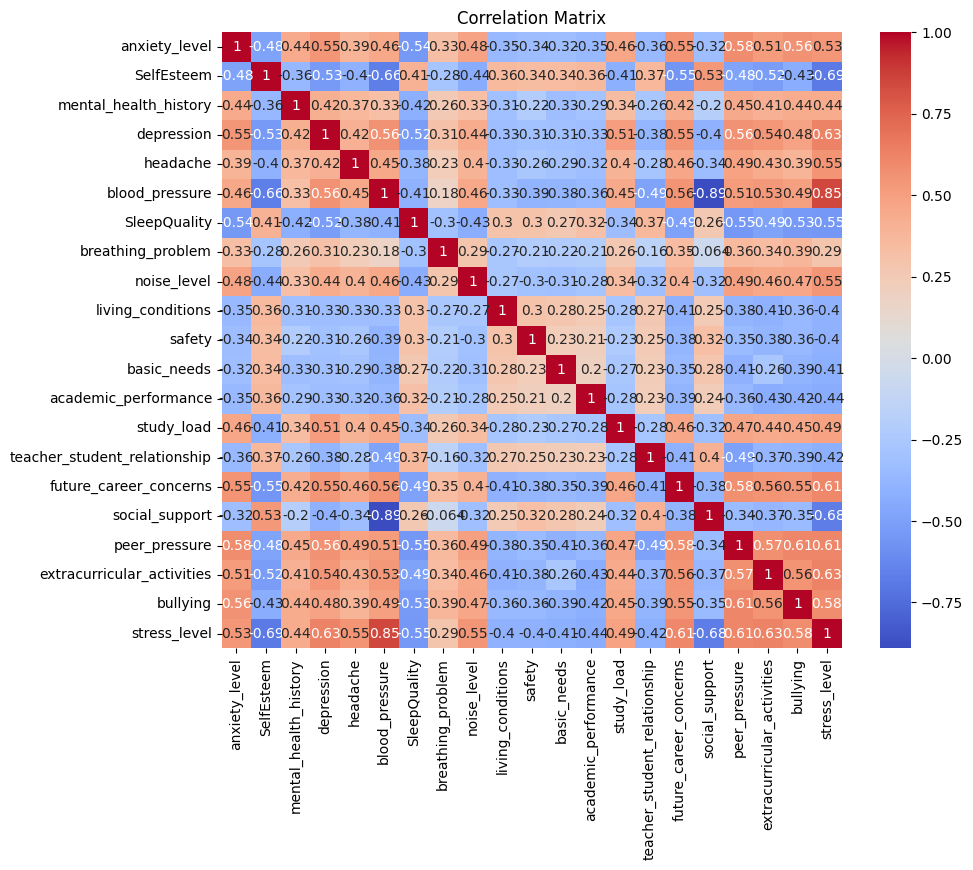

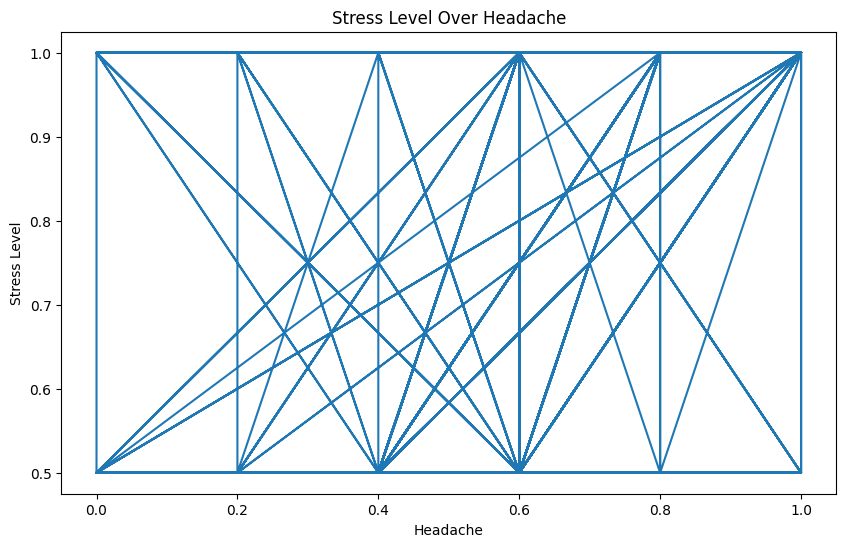

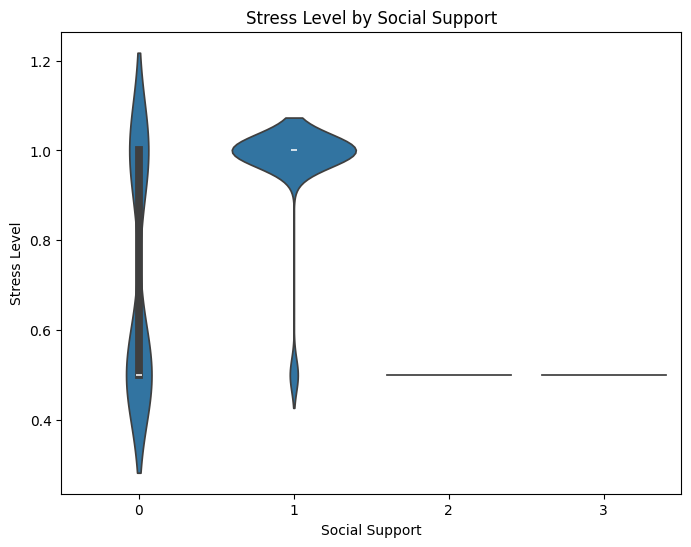

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check data types before conversion
print(sl.dtypes)

# Inspect unique values in categorical columns
print(sl['social_support'].unique())
print(sl['SelfEsteem'].unique())

# Convert categorical columns to numeric
le_social = LabelEncoder()
le_self_esteem = LabelEncoder()

sl['social_support'] = le_social.fit_transform(sl['social_support'])
sl['SelfEsteem'] = le_self_esteem.fit_transform(sl['SelfEsteem'])

# Ensure stress_level is numeric
sl['stress_level'] = pd.to_numeric(sl['stress_level'], errors='coerce')

# Drop any rows with NaN values
sl = sl.dropna()

# Recheck data types after conversion
print(sl.dtypes)

# 1. Histogram of Stress Level
plt.figure(figsize=(8, 6))
plt.hist(sl['stress_level'], bins=10, edgecolor='black')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of Stress Level vs. Sleep Quality
plt.figure(figsize=(8, 6))
plt.scatter(sl['SleepQuality'], sl['stress_level'])
plt.title('Stress Level vs. Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.show()

# 4. Bar chart of Average Stress Level by Self-Esteem
plt.figure(figsize=(8, 6))
sl.groupby('SelfEsteem')['stress_level'].mean().plot(kind='bar')
plt.title('Average Stress Level by Self-Esteem')
plt.xlabel('Self-Esteem')
plt.ylabel('Average Stress Level')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_sl = sl.select_dtypes(include=['number'])  # Filter for numeric columns
sns.heatmap(numerical_sl.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Line plot of Stress Level over Headache (adjust accordingly)
plt.figure(figsize=(10, 6))
plt.plot(sl['headache'], sl['stress_level'])
plt.title('Stress Level Over Headache')
plt.xlabel('Headache')
plt.ylabel('Stress Level')
plt.show()

# 8. Violin plot of Stress Level by Social Support
plt.figure(figsize=(8, 6))
sns.violinplot(x='social_support', y='stress_level', data=sl)
plt.title('Stress Level by Social Support')
plt.xlabel('Social Support')
plt.ylabel('Stress Level')
plt.show()

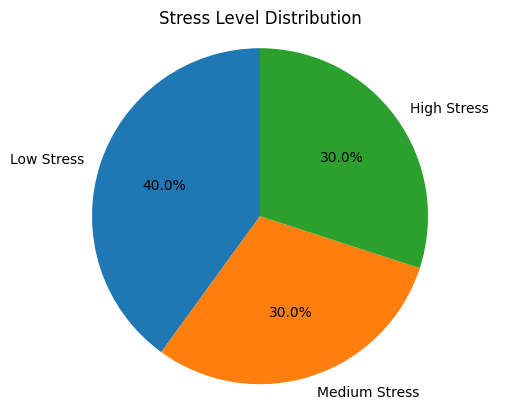

In [34]:
import matplotlib.pyplot as plt

labels = ['Low Stress', 'Medium Stress', 'High Stress']
sizes = [40, 30, 30]  # Percentage or values for each category

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Stress Level Distribution')

# Ensure that the circle is a proper circle
plt.axis('equal')

# Show the chart
plt.show()


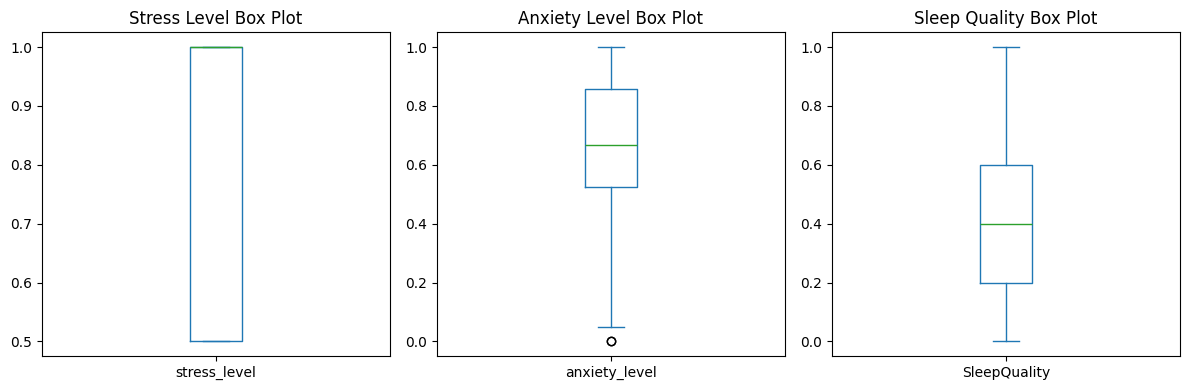

In [35]:
# Import the necessary library (if not already imported)
import matplotlib.pyplot as plt

# Create the first box plot for 'stress_level'
plt.figure(figsize=(12, 4))  # Adjust figure size as needed

plt.subplot(1, 3, 1)  # Create the first subplot (1 row, 3 columns, 1st plot)
sl['stress_level'].plot(kind='box')  # Create a box plot of 'stress_level'
plt.title('Stress Level Box Plot')

# Create the second box plot for 'anxiety_level'
plt.subplot(1, 3, 2)  # Create the second subplot
sl['anxiety_level'].plot(kind='box')
plt.title('Anxiety Level Box Plot')

# Create the third box plot for 'sleep_quality'
plt.subplot(1, 3, 3)  # Create the third subplot
sl['SleepQuality'].plot(kind='box')
plt.title('Sleep Quality Box Plot')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# Classification Algorithms

In [37]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy for binning

# 2. Define Features (X) and Target (y)
X = sl[['anxiety_level', 'SleepQuality', 'SelfEsteem', 'social_support', 'headache']]
y = sl['stress_level']

# Convert 'stress_level' to discrete categories if necessary
# Example using numpy.digitize to create 3 categories:
bins = np.array([0, 0.33, 0.66, 1])  # Define your stress level category boundaries
y = np.digitize(y, bins) - 1  # Assign labels to categories

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# a. Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# ... (rest of your code for other models and evaluation) ...

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.9383561643835616
              precision    recall  f1-score   support

           1       0.97      0.91      0.94        81
           3       0.90      0.97      0.93        65

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report

# --- Model Definitions ---
logreg_model = LogisticRegression(random_state=42, solver='liblinear')
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}
results = []
cv_scores = {}

# --- Train, Predict, and Cross-Validate ---
for name, model in models.items():
    # 1. Train Model
    model.fit(X_train, y_train)

    # 2. Predict on Test Set
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # 3. K-Fold Cross-Validation (5-Fold)
    # Using cross_validate for multiple metrics and cleaner output
    cv_result = cross_validate(model, X_train, y_train, cv=5,
                               scoring=['accuracy', 'f1_weighted'],
                               return_train_score=False)

    avg_cv_accuracy = cv_result['test_accuracy'].mean()

    results.append({
        'Model': name,
        'Test Accuracy': f"{test_accuracy:.4f}",
        'CV Accuracy (5-Fold)': f"{avg_cv_accuracy:.4f}"
    })

    # Print Classification Report for detailed view (Good for final selection)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, y_pred))

# --- Final Comparison Table ---
comparison_df = pd.DataFrame(results)
print("\n Model Comparison Summary")
print(comparison_df.sort_values(by='Test Accuracy', ascending=False).to_markdown(index=False))

# Identify the best model based on both test accuracy and CV stability
best_model_name = comparison_df.sort_values(by='Test Accuracy', ascending=False).iloc[0]['Model']
print(f"\nConclusion: The best model based on preliminary Test Accuracy and 5-Fold CV is: {best_model_name}")


Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.97      0.91      0.94        81
           3       0.90      0.97      0.93        65

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146


Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        81
           3       0.94      0.94      0.94        65

    accuracy                           0.95       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.95      0.95      0.95       146


Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.95      0.94      0.94        81
           3       0.92      0.94      0.93        65

    accuracy                           0.94       146
   macro av

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
# Get feature names from the original DataFrame X before splitting and scaling
feature_names = X.columns

# Combine features and importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top N features (e.g., top 10)
top_n = 10
# Ensure we don't try to select more features than available
top_n = min(top_n, len(feature_names))
top_features = importance_df.head(top_n)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print(f"\nTop {top_n} Feature Importances:")
print(top_features.to_markdown(index=False))


Top 5 Feature Importances:
| Feature        |   Importance |
|:---------------|-------------:|
| social_support |    0.312999  |
| SleepQuality   |    0.266486  |
| SelfEsteem     |    0.232645  |
| anxiety_level  |    0.13508   |
| headache       |    0.0527891 |
